In [8]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
     


In [23]:

df = pd.read_csv("king-rook.data", header=None)
df.head()

,0,1,2,3,4,5,6
0,a,1,b,3,c,2,draw
1,a,1,c,1,c,2,draw
2,a,1,c,1,d,1,draw
3,a,1,c,1,d,2,draw
4,a,1,c,2,c,1,draw


In [24]:
#use label encoder to convert categorical values to numerical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in [0,2,4,6]:
    df[col] = le.fit_transform(df[col])
df.head()

,0,1,2,3,4,5,6
0,0,1,1,3,2,2,0
1,0,1,2,1,2,2,0
2,0,1,2,1,3,1,0
3,0,1,2,1,3,2,0
4,0,1,2,2,2,1,0


In [25]:
train_accs = []
test_accs = []
svm_best_params = []

for i in range(10):

  print('-------- Sample {}-------\n'.format(i))
  dfi = df.sample(frac=0.1)
  X = dfi.iloc[:, :-1].values
  y = dfi.iloc[:, -1].values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

  # Optimize the SVM using grid search with cross-validation
  param_grid = {
      'C': [0.1, 1, 10, 100],
      'gamma': [0.1, 0.01, 0.001, 0.0001],
      'kernel': ['linear', 'rbf', 'sigmoid']
  }
  grid_search = GridSearchCV(SVC(), param_grid, cv=3, verbose=100, refit=True)
  grid_search.fit(X_train, y_train)
  best_params = grid_search.best_params_
  svm_best_params.append(best_params)

  print(best_params)
  # Train and test the SVM with the best parameters
  svm = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'], max_iter=1000)
  svm.fit(X_train, y_train)
  train_acc = svm.score(X_train, y_train)
  test_acc = svm.score(X_test, y_test)
  train_accs.append(train_acc)
  test_accs.append(test_acc)

-------- Sample 0-------

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3; 1/48] START C=0.1, gamma=0.1, kernel=linear............................
[CV 1/3; 1/48] END C=0.1, gamma=0.1, kernel=linear;, score=0.263 total time=   0.2s
[CV 2/3; 1/48] START C=0.1, gamma=0.1, kernel=linear............................
[CV 2/3; 1/48] END C=0.1, gamma=0.1, kernel=linear;, score=0.246 total time=   0.2s
[CV 3/3; 1/48] START C=0.1, gamma=0.1, kernel=linear............................
[CV 3/3; 1/48] END C=0.1, gamma=0.1, kernel=linear;, score=0.271 total time=   0.1s
[CV 1/3; 2/48] START C=0.1, gamma=0.1, kernel=rbf...............................
[CV 1/3; 2/48] END C=0.1, gamma=0.1, kernel=rbf;, score=0.226 total time=   0.2s
[CV 2/3; 2/48] START C=0.1, gamma=0.1, kernel=rbf...............................
[CV 2/3; 2/48] END C=0.1, gamma=0.1, kernel=rbf;, score=0.214 total time=   0.2s
[CV 3/3; 2/48] START C=0.1, gamma=0.1, kernel=rbf...............................
[CV 3/3; 2/4

In [26]:

svm_best_params

[{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}]

In [27]:

test_accs

[0.4691211401425178,
 0.505938242280285,
 0.48693586698337293,
 0.49524940617577196,
 0.47980997624703087,
 0.4750593824228028,
 0.497624703087886,
 0.47030878859857483,
 0.4750593824228028,
 0.49524940617577196]

In [28]:

final_df = pd.DataFrame(data=[test_accs, svm_best_params], index=['Accuracy', 'Parameters']).T
final_df
     

,Accuracy,Parameters
0,0.469121,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}"
1,0.505938,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}"
2,0.486936,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}"
3,0.495249,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}"
4,0.47981,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}"
5,0.475059,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}"
6,0.497625,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}"
7,0.470309,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}"
8,0.475059,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}"
9,0.495249,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}"


In [29]:

max_index = test_accs.index(max(test_accs))
max_index
     
     

1

In [30]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=max_index)
     

In [31]:

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
iterations = list()
acc_list = list()

for i in range(1000):
    x = i+1
    svm = SVC(C=100, gamma=0.1, kernel='rbf', max_iter=x)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc_list.append(accuracy)
    iterations.append(x)
     

In [33]:
import numpy as np
iterations = np.array(iterations)
acc_list = np.array(acc_list)
     

print(iterations.shape)
print(acc_list.shape)

(1000,)
(1000,)


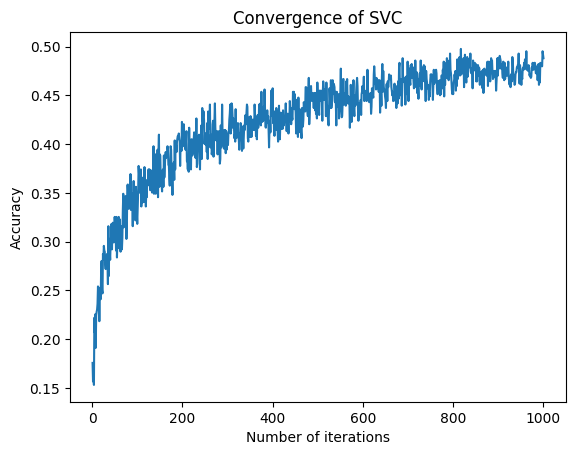

In [34]:

plt.plot(iterations, acc_list)
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.title('Convergence of SVC')
plt.show()